<a href="https://colab.research.google.com/github/Madeshkanth/Brainwave_Matrix_Intern/blob/main/sales_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("/content/data.csv")  # Change delimiter as needed
print(df)


             Date Store ID Product ID     Category Region  Inventory Level  \
0      01-01-2022     S001      P0001    Groceries  North              231   
1      01-01-2022     S001      P0002         Toys  South              204   
2      01-01-2022     S001      P0003         Toys   West              102   
3      01-01-2022     S001      P0004         Toys  North              469   
4      01-01-2022     S001      P0005  Electronics   East              166   
...           ...      ...        ...          ...    ...              ...   
73095  01-01-2024     S005      P0016    Furniture   East               96   
73096  01-01-2024     S005      P0017         Toys  North              313   
73097  01-01-2024     S005      P0018     Clothing   West              278   
73098  01-01-2024     S005      P0019         Toys   East              374   
73099  01-01-2024     S005      P0020    Groceries   East              117   

       Units Sold  Units Ordered  Demand Forecast  Price  Disco

In [ ]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       Inventory Level    Units Sold  Units Ordered  Demand Forecast  \
count     73100.000000  73100.000000   73100.000000     73100.000000   
mean        274.469877    136.464870     110.004473       141.494720   
std         129.949514    108.919406      52.277448       109.254076   
min          50.000000      0.000000      20.000000        -9.990000   
25%         162.000000     49.000000      65.000000        53.670000   
50%         273.000000    107.000000     110.000000       113.015000   
75%         387.000000    203.000000     155.000000       208.052500   
max         500.000000    499.000000     200.000000       518.550000   

              Price      Discount  Holiday/Promotion  Competitor Pricing  
count  73100.000000  73100.000000       73100.000000        73100.000000  
mean      55.135108     10.009508           0.497305           55.146077  
std       26.021945      7.083746           0.499996           26.191408  
min       10.000000      0.000

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

In [ ]:
print(df.isnull().sum())

Date                  0
Store ID              0
Product ID            0
Category              0
Region                0
Inventory Level       0
Units Sold            0
Units Ordered         0
Demand Forecast       0
Price                 0
Discount              0
Weather Condition     0
Holiday/Promotion     0
Competitor Pricing    0
Seasonality           0
dtype: int64


In [ ]:
print(df.columns)

Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality'],
      dtype='object')


In [ ]:
top_products = df.groupby('Product ID')['Units Sold'].sum().sort_values(ascending=False).head(10)
print(top_products)

Product ID
P0016    508472
P0020    507708
P0014    507622
P0015    507283
P0005    503648
P0009    502086
P0013    500619
P0017    500510
P0011    499362
P0007    499321
Name: Units Sold, dtype: int64


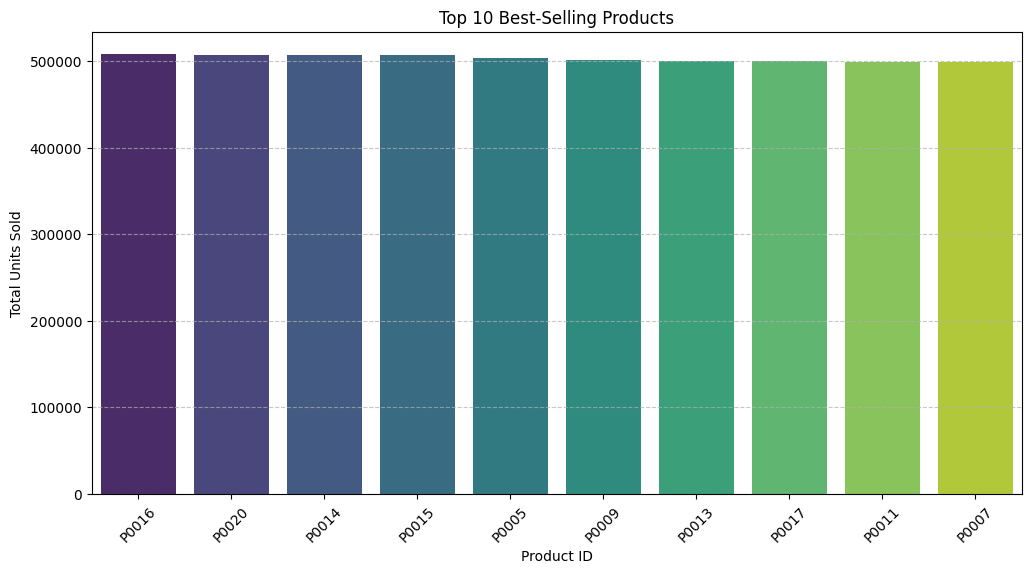

In [ ]:
# Load Data (Assuming df is already loaded)
df.columns = df.columns.str.strip()  # Removes leading/trailing spaces

# Group by 'Product ID' and sum 'Units Sold'
top_products = df.groupby('Product ID')['Units Sold'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.index, y=top_products.values, palette="viridis")

plt.xlabel("Product ID")
plt.ylabel("Total Units Sold")
plt.title("Top 10 Best-Selling Products")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.7)

plt.show()


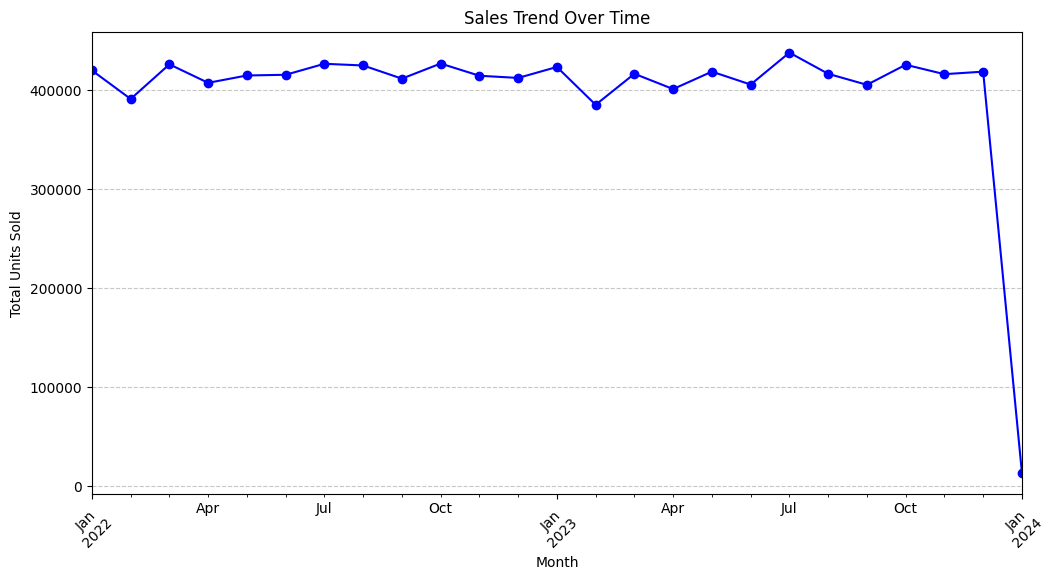

In [ ]:
# Convert Date Column with correct format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Group by Month & Sum Sales
df['Month'] = df['Date'].dt.to_period('M')
sales_trend = df.groupby('Month')['Units Sold'].sum()

# Plot Sales Trend Over Time
plt.figure(figsize=(12, 6))
sales_trend.plot(marker='o', linestyle='-', color='b')

plt.xlabel("Month")
plt.ylabel("Total Units Sold")
plt.title("Sales Trend Over Time")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", alpha=0.7)

plt.show()



Impact of Discount on Sales:
Discount
0     1989554
5     1992655
10    1984257
15    1998447
20    2010669
Name: Units Sold, dtype: int64


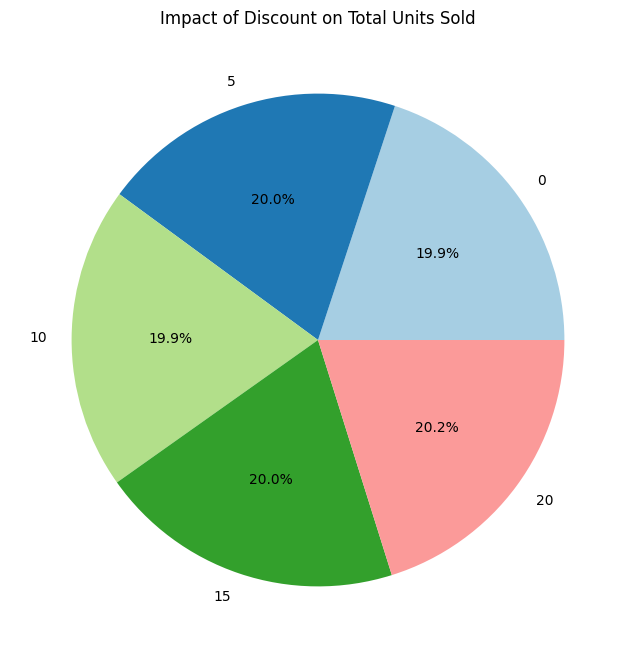

In [ ]:
import matplotlib.pyplot as plt

# Ensure 'Discount' and 'Units Sold' exist in the dataset
if 'Discount' in df.columns and 'Units Sold' in df.columns:
    # Group by Discount and calculate total Units Sold
    discount_impact = df.groupby('Discount')['Units Sold'].sum()

    # Print Discount Impact on Sales
    print("\nImpact of Discount on Sales:")
    print(discount_impact)

    # Visualization (Pie Chart)
    plt.figure(figsize=(8, 8))
    plt.pie(discount_impact, labels=discount_impact.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)

    plt.title("Impact of Discount on Total Units Sold")
    plt.show()


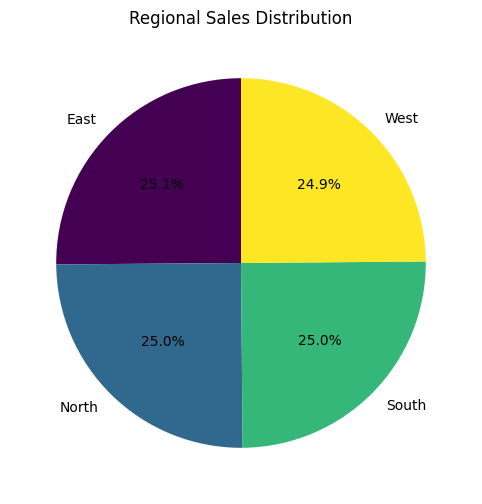

<ipython-input-29-243bffbd1673>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Weather', y='Units_Sold', data=df, palette='coolwarm')


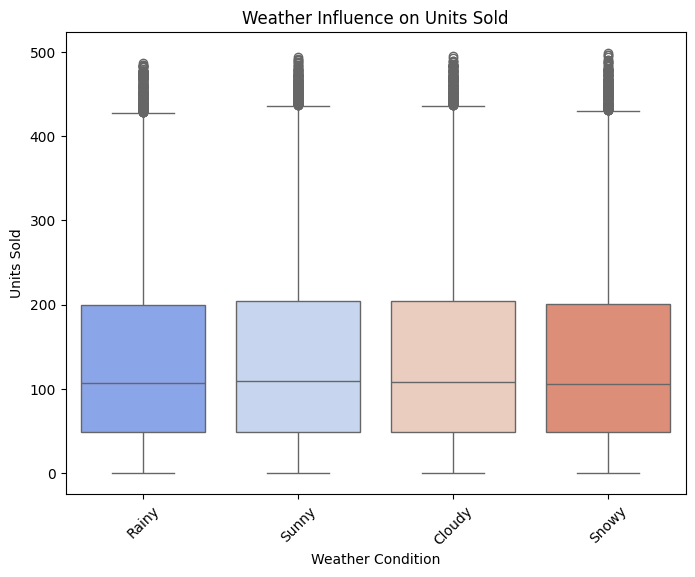

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (replace 'your_data.csv' with actual file path)

# Rename columns to match expected names
df.rename(columns={'Weather Condition': 'Weather', 'Units Sold': 'Units_Sold'}, inplace=True)

# Check required columns
required_columns = {'Region', 'Units_Sold', 'Weather', 'Price'}  # Adjust 'Price' if it's your sales column
if not required_columns.issubset(df.columns):
    raise ValueError(f"Dataset must contain these columns: {required_columns}")

# 1. Regional Sales Distribution - Pie Chart
plt.figure(figsize=(8, 6))
df.groupby('Region')['Price'].sum().plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title('Regional Sales Distribution')
plt.ylabel('')  # Hide y-label
plt.show()

# 2. Weather Influence on Sales - Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Weather', y='Units_Sold', data=df, palette='coolwarm')
plt.title('Weather Influence on Units Sold')
plt.xlabel('Weather Condition')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.show()
